<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Spring 2022</h5>

---


# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 

> **Instructions:**
> * You will be using Python 3.
> * Please upload your assignment on CW.
> * Your file name should be in format of ***HW# _Name_Student ID***
> * Do not upload other students’ answers.
> * If you have any inquiry regarding this assignment, message '@hamidrbnd' in Telegram or email hr_bandeali@yahoo.com.

Let's get started!




## Import 
>Put all of your imports for this file in the below cell.

In [2]:
### START CODE HERE ###
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
1 & 2 & 3\\
2 & 1 & 5\\
3 & 5 & 4
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers of [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number). The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
1 & 3 & 13\\
1 & 5 & 21\\
2 & 8 & 34
\end{array}\right)
$$ 

In [76]:
### START CODE HERE ###
A = np.random.randint(low = 0,high = 10, size = (3,3))

fib_list = [1, 1]
any(map(lambda _: fib_list.append(sum(fib_list[-2:])), range(2, 36)))

B0 = np.array([fib_list[i] for i in range(len(fib_list)) if i%3==0])
B1 = np.array([fib_list[i] for i in range(len(fib_list)) if i%3==1])
B2 = np.array([fib_list[i] for i in range(len(fib_list)) if i%3==2])
B0 = B0.reshape(4,3).T
B1 = B1.reshape(4,3).T
B2 = B2.reshape(4,3).T

B=np.concatenate((B0, B1,B2))
B = B.reshape(3,3,4)

print("B=", B, '\n')
print("A=", A, '\n', "B[:,:,0]=", B[:,:,0])
### END CODE HERE ###

B= [[[       1       55     4181   317811]
  [       3      233    17711  1346269]
  [      13      987    75025  5702887]]

 [[       1       89     6765   514229]
  [       5      377    28657  2178309]
  [      21     1597   121393  9227465]]

 [[       2      144    10946   832040]
  [       8      610    46368  3524578]
  [      34     2584   196418 14930352]]] 

A= [[0 4 1]
 [1 6 9]
 [2 0 7]] 
 B[:,:,0]= [[ 1  3 13]
 [ 1  5 21]
 [ 2  8 34]]


## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [77]:
### START CODE HERE ###
B[:, :, 3] = A
print(B)
### END CODE HERE ###

[[[     1     55   4181      0]
  [     3    233  17711      4]
  [    13    987  75025      1]]

 [[     1     89   6765      1]
  [     5    377  28657      6]
  [    21   1597 121393      9]]

 [[     2    144  10946      2]
  [     8    610  46368      0]
  [    34   2584 196418      7]]]


## Axis Swap 
>Swap the second(B[:, :, 2]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [78]:
### START CODE HERE ###
B[:, :, 3], B[:, :, 2] = B[:, :, 2], B[:, :, 3].copy()
print(B)
### END CODE HERE ###

[[[     1     55      0   4181]
  [     3    233      4  17711]
  [    13    987      1  75025]]

 [[     1     89      1   6765]
  [     5    377      6  28657]
  [    21   1597      9 121393]]

 [[     2    144      2  10946]
  [     8    610      0  46368]
  [    34   2584      7 196418]]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [79]:
### START CODE HERE ###
B = B.T
print(B)
### END CODE HERE ###

[[[     1      1      2]
  [     3      5      8]
  [    13     21     34]]

 [[    55     89    144]
  [   233    377    610]
  [   987   1597   2584]]

 [[     0      1      2]
  [     4      6      0]
  [     1      9      7]]

 [[  4181   6765  10946]
  [ 17711  28657  46368]
  [ 75025 121393 196418]]]


## Matrix Multiplication
>Calculate the matrix multiplication of three slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [85]:
### START CODE HERE ###
D = B.T # because we transposed B in previous section and we can't make a 3*3 array using B.transpose

C = np.matmul(np.matmul(D[:, :, 0],D[:, :, 1]),D[:, :, 2])
print(C)
### END CODE HERE ###

[[ 88034  64540 361430]
 [141400 103664 580528]
 [229434 168204 941958]]


## Determinant
>Calculate the determinant of the array A and print it.

In [86]:
### START CODE HERE ###
a = np.linalg.det(A)
print(a)
### END CODE HERE ###

32.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [4]:
### START CODE HERE ###
Data = pd.read_csv('IMDB-Movie-Data.csv')
Data.head(5)
### END CODE HERE ###

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [73]:
### START CODE HERE ###
Actors_dict = {}
for line in Data['Actors']:
    for i in re.split(', |,', line):
        Actors_dict[i] = Actors_dict.get(i, 0) + 1

rslt_df = pd.DataFrame(Actors_dict.items(), columns=['Name', 'Number of movies'])
rslt_df.sort_values(['Number of movies', 'Name'], ascending=[False, True]).reset_index(drop=True)
### END CODE HERE ###

,Name,Number of movies
0,Mark Wahlberg,15
1,Hugh Jackman,14
2,Brad Pitt,13
3,Christian Bale,13
4,Anne Hathaway,12
...,...,...
1980,Zachery Ty Bryan,1
1981,Zoe Kazan,1
1982,Émilie Leclerc,1
1983,Ólafur Darri Ólafsson,1


## Average Rate
>Caculate the average rate of every year and sort them in descending order. Print them as a dictionary with year as key and average rate as value.

In [78]:
### START CODE HERE ###
Data.groupby('Year')['Rating'].mean().sort_values(ascending=False)
### END CODE HERE ###

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

## Score Histogram
>Draw the histogram of metascores and ratings. 

array([[<AxesSubplot:title={'center':'Metascore'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

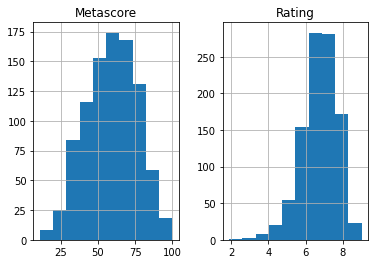

In [79]:
### START CODE HERE ###
Data.hist(['Metascore','Rating'])
### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [80]:
### START CODE HERE ###
Data[['Rating', 'Votes', 'Metascore']].corr()
### END CODE HERE ###

,Rating,Votes,Metascore
Rating,1.000000,0.511537,0.631897
Votes,0.511537,1.000000,0.325684
Metascore,0.631897,0.325684,1.000000


# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [86]:
### START CODE HERE ###
with open("Name_actors.txt", 'w') as f:
    for i in Actors_dict:
        f.write(f"{i}\n")
### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

<function matplotlib.pyplot.show(close=None, block=None)>

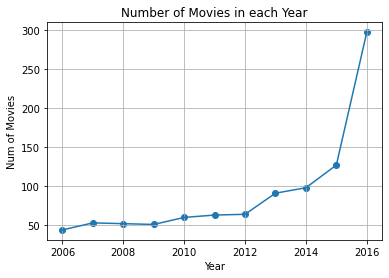

In [104]:
### START CODE HERE ###
year_dict = {}
for i in Data['Year']:
    year_dict[i] = year_dict.get(i, 0) + 1
year_dict = dict(sorted(year_dict.items()))

plt.plot(*zip(*year_dict.items()))
plt.scatter(year_dict.keys(), year_dict.values())

plt.xlabel("Year")
plt.ylabel("Num of Movies")
plt.title("Number of Movies in each Year")
plt.grid()
plt.show
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 20 Hz. 
> set the x_label, y_label and title for your plot.

Text(0, 0.5, 'Cos(X)')

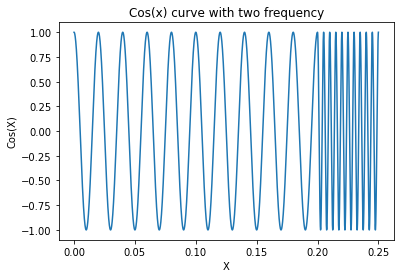

In [5]:
### START CODE HERE ###
x1 = np.arange(0, 0.2, 0.00001)
y1 = np.cos(2*np.pi*50*x1)
x2 = np.arange(0.2, 0.2+0.05, 0.00001)
y2 = np.cos(2*np.pi*200*x2)

plt.plot(np.concatenate((x1, x2)), np.concatenate((y1, y2)))
plt.title("Cos(x) curve with two frequency")
plt.xlabel("X")
plt.ylabel("Cos(X)")
### END CODE HERE ###